In [22]:
import asyncio
import threading
import time
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from src.kinetic_mount_controller import KineticMountController
from src.time_tagger import TT_Simulator, two_particle_states
%matplotlib widget

In [23]:
def setup():

    #KMC = KineticMountController(number_of_devices=3)
    pass

def performance_loop():
    pass


In [53]:
# Setup kinetic mounts and calibrate
setup()

# Setup Simulator
TTSim = TT_Simulator(two_particle_states['psi_minus'], initial_state_noise=0, debug=True)



TIME-TAGGER SIMULATOR
---------------------------------------------------------------
Initialising . . .

For the initial state:
Matrix([[0], [sqrt(2)/2], [-sqrt(2)/2], [0]])

The correlation function has the form:
-cos(2*theta_a - 2*theta_b)

We find the following optimal CHSH angles (in multiples of pi):
a0:	0.0000, a1:	0.2500
b0:	-0.3750, b1:	0.3750

And measurements taken at this angle will produce as CHSH value S of
S = 2.8284 ( 100% of S_bell )

---------------------------------------------------------------


In [54]:

a_angles = TTSim.CHSH_angles[:2]
b_angles = TTSim.CHSH_angles[2:]

for _ in range(10):
    print(TTSim.measure_n_entangled_pairs(1000, np.random.choice(a_angles), np.random.choice(b_angles)))


[ 69 445 432  54]
[ 73 419 433  75]
[ 67 445 409  79]
[ 12 480 503   5]
[156 326 344 174]
[  7 506 474  13]
[ 54 456 415  75]
[170 330 326 174]
[ 15 468 510   7]
[190 328 337 145]


Button(description='Start Simulation', style=ButtonStyle())

Button(description='Stop Simulation', style=ButtonStyle())

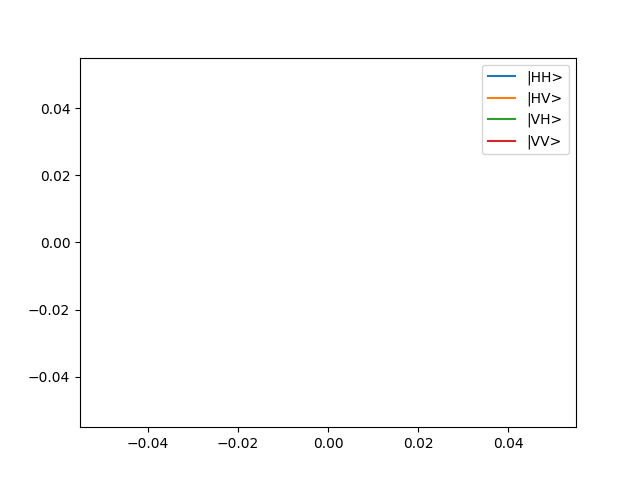

Simulation stopped.


In [55]:
# Define a flag
stop_simulation = False

def run_simulation():
    global stop_simulation
    data = []
    i = 0
    while not stop_simulation:
        # Simulate data generation
        new_data = TTSim.measure_n_entangled_pairs(200, np.random.choice(a_angles), np.random.choice(b_angles))
        data.append(new_data)
        i += 1
        time.sleep(0.01)  # simulate delay
        yield new_data  # yield data for real-time plotting
        
        if i >= 1000:  # Optional: stop after 100 iterations
            break
    print("Simulation stopped.")
    
# Start the thread
def start_thread():
    global stop_simulation
    stop_simulation = False
    thread = threading.Thread(target=threaded_simulation)
    thread.start()

# Function to update the plot
def update_plot(data):
    lineHH.set_xdata(list(range(len(data))))
    lineHH.set_ydata([x[0] for x in data])
    lineHV.set_xdata(list(range(len(data))))
    lineHV.set_ydata([x[1] for x in data])
    lineVH.set_xdata(list(range(len(data))))
    lineVH.set_ydata([x[2] for x in data])
    lineVV.set_xdata(list(range(len(data))))
    lineVV.set_ydata([x[3] for x in data])
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw()

# Thread function to run simulation and update plot
def threaded_simulation():
    data = []
    for value in run_simulation():
        data.append(value)
        update_plot(data)

# Interactive controls
def stop_thread():
    global stop_simulation
    stop_simulation = True

fig, ax = plt.subplots()
lineHH, = ax.plot([], [], label=r"|HH>")
lineHV, = ax.plot([], [], label=r"|HV>")
lineVH, = ax.plot([], [], label=r"|VH>")
lineVV, = ax.plot([], [], label=r"|VV>")

ax.legend(loc='upper right')
#ax.set_xlim(0, 100)
#ax.set_ylim(0, 10)

# Adding buttons to control simulation
start_button = widgets.Button(description="Start Simulation")
stop_button = widgets.Button(description="Stop Simulation")

start_button.on_click(lambda x: start_thread())
stop_button.on_click(lambda x: stop_thread())

display(start_button, stop_button)
